# Optimize Random Forest's parameters
Since we find RF might have possiblity to increase regularization strength to solve over-fitting issue, we start to optimize paramters (n_estimators & max_depth) for RF more serioiusly. Also because we know the models without PCA as a transformation have better performance, we only focus on the algorithm chain without PCA.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.style.use('seaborn-colorblind')
#mpl.rcParams['xtick.labelsize'] = 8
#mpl.rcParams["image.cmap"] = 'gray'
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

%matplotlib inline

# Gridsearch result
Due to the efficientcy, different param_gird are applied in multiple gridsearch attempts.

In [2]:
rf_df = pd.concat(
    [pd.read_csv('results/roll_rf_grid_20201123.csv', index_col = 0),
     pd.read_csv('results/roll_rf_grid_2_20201123.csv', index_col = 0),
     pd.read_csv('results/roll_rf_grid_3_20201123.csv', index_col = 0)],
    axis=0, join='inner'
).reset_index(drop=True)
rf_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,17.465506,1.309879,2.799954,0.242880,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.615059,0.637462,0.549436,0.654534,0.639427,0.619184,0.037082,2
1,211.662254,3.420347,8.492379,0.377713,10,1000,"{'max_depth': 10, 'n_estimators': 1000}",0.617969,0.640305,0.543018,0.652739,0.639583,0.618723,0.039471,3
2,976.420216,7.371438,19.788675,3.414040,10,5000,"{'max_depth': 10, 'n_estimators': 5000}",0.619615,0.638728,0.546281,0.653607,0.639896,0.619625,0.038236,1
3,23.640976,0.638236,3.349163,0.136095,100,100,"{'max_depth': 100, 'n_estimators': 100}",0.541576,0.609005,0.531856,0.544583,0.483676,0.542139,0.040002,10
4,324.101239,6.639247,11.497664,0.969917,100,1000,"{'max_depth': 100, 'n_estimators': 1000}",0.547678,0.612669,0.530868,0.544131,0.486908,0.544451,0.040398,7
5,1272.693600,13.258301,20.889014,1.964090,100,5000,"{'max_depth': 100, 'n_estimators': 5000}",0.549537,0.615323,0.532758,0.544040,0.489327,0.546197,0.040519,4
6,42.209622,1.430755,5.869971,0.137613,500,100,"{'max_depth': 500, 'n_estimators': 100}",0.541576,0.609005,0.531856,0.544583,0.483676,0.542139,0.040002,10
7,349.613595,4.582736,9.150259,0.339526,500,1000,"{'max_depth': 500, 'n_estimators': 1000}",0.547678,0.612669,0.530868,0.544131,0.486908,0.544451,0.040398,7
8,1249.149728,7.332412,17.498740,1.487534,500,5000,"{'max_depth': 500, 'n_estimators': 5000}",0.549537,0.615323,0.532758,0.544040,0.489327,0.546197,0.040519,4
9,53.940703,0.973296,6.029640,0.362364,1000,100,"{'max_depth': 1000, 'n_estimators': 100}",0.541576,0.609005,0.531856,0.544583,0.483676,0.542139,0.040002,10


In [22]:
np.max(rf_df.mean_test_score.astype(float))

0.6198119869824011

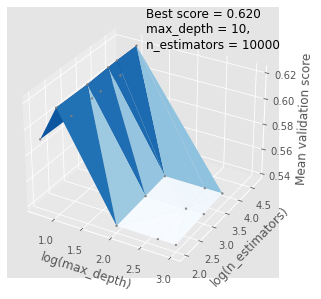

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize = (7,5))
ax = plt.gca(projection='3d')
xx = rf_df.param_max_depth.values.astype(int)
yy = rf_df.param_n_estimators.values.astype(int)
zz = rf_df.mean_test_score.values.astype(float)
max_index = np.argmax(zz)

surf = ax.plot_trisurf(np.log10(xx), np.log10(yy), zz, cmap = cm.Blues, linewidth = 0.1)
ax.scatter(np.log10(xx), np.log10(yy), zz, c = 'grey', s = 3, alpha = 1)

# mark the best score
text = 'Best score = {:.3f}\nmax_depth = {},\nn_estimators = {}'.format(zz[max_index], xx[max_index], yy[max_index])
ax.text(2.5, 2, .68,text, fontsize = 12)
#ax.quiver(np.log10(xx[max_index]), np.log10(yy[max_index]), zz[max_index], 
#          .3, .3, .3, color='gray', alpha=.6)

ax.set_zticks([0.52, 0.54, 0.56, 0.58, 0.60, 0.62])
ax.set_xlabel('log(max_depth)')
ax.set_ylabel('log(n_estimators)')
ax.set_zlabel('Mean validation score')
#fig.colorbar(surf, shrink = 0.5, aspect = 5)
fig.savefig('results/roll_rf_grid_20201123.png')

# Export model and evaluate its performance

In [2]:
from split import my_train_test_split

data_df = pd.read_csv('data/XRF_ML_cr.csv')
X = data_df.iloc[:, 1:-2].values
y = data_df['facies_merge_2'].values
groups = data_df['core_section'].values

train_idx, test_idx = my_train_test_split(y, groups)

In [4]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10000, max_depth=10, class_weight='balanced', random_state=24, n_jobs=-1)
rf.fit(X[train_idx], y[train_idx])

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       n_estimators=10000, n_jobs=-1, random_state=24)

In [6]:
from joblib import dump, load
dump(rf, 'models/roll_rf_model_{}.joblib'.format(date)) 

['models/roll_rf_model_20201123.joblib']

In [7]:
facies = ['shoreface', 'channel', 'beach-foreshore', 'sand flat', 'mud flat',
       'lagoon', 'peat', 'soil', 'eolian/fluvial (W)',
       'shallow marine', 'moraine', 'eolian/fluvial']

Facies = []
for fa in facies:
    Facies.append(fa.capitalize())

Facies

['Shoreface',
 'Channel',
 'Beach-foreshore',
 'Sand flat',
 'Mud flat',
 'Lagoon',
 'Peat',
 'Soil',
 'Eolian/fluvial (w)',
 'Shallow marine',
 'Moraine',
 'Eolian/fluvial']

In [ ]:
from joblib import load
rf = load('models/roll_rf_model_20201123.joblib')

In [8]:
y_df = pd.DataFrame(y[test_idx], columns=['y'])
y_df['y_rf'] = rf.predict(X[test_idx])

In [9]:
y_df

,y,y_rf
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
22482,6,6
22483,6,6
22484,6,6
22485,6,6


## Balanced score

In [10]:
from sklearn.metrics import balanced_accuracy_score as score
print('Balanced score of rf in training set: {:.2f}'.format(score(y_true=y[train_idx], y_pred=rf.predict(X[train_idx]))))
print('Balanced score of rf in test set: {:.2f}'.format(score(y_true=y_df.y, y_pred=y_df['y_rf'])))

Balanced score of rf in training set: 0.89
Balanced score of rf in test set: 0.55


The over-fitting is a bit improved, but probably not enough....

In [11]:
def plot_recall(data_df, y_preds, Facies, split):
    """
    data_df is the dataframe having info and labels.
    y_preds is a list of the column names of labels you want to plot.
    Faceis is a list of facies names.
    split is the name of the dataset, which used for filename (train or test)
    """
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import balanced_accuracy_score as score

    for col in y_preds:
        # make confusion matrix between prediction and actual labels
        confusion = confusion_matrix(data_df.y, data_df[col])
        model_name = col[2:]
        con_df = pd.DataFrame(confusion, index = Facies, columns = Facies)
        #con_df.to_csv('results/roll_confusion_{}_{}.csv'.format(model_name, date))

        # normalize the counts ineach row and present in percent
        x = np.copy(confusion).astype(float)
        x /= x.sum(axis = 1, keepdims = True)
        con_per = pd.DataFrame((x*100).astype(int), index = Facies, columns = Facies)
        #con_per.to_csv('results/roll_recall_%_{}_{}.csv'.format(model_name, date))

        # Plot the matrix
        fig, ax = plt.subplots(1, 1, figsize = (7, 5))
        sns.heatmap(con_per, annot = con_per.astype(str), ax = ax, cmap = 'GnBu', square = True, vmin=0, vmax=100,
                    xticklabels = con_per.index, yticklabels = con_per.columns, fmt = 's', 
                    annot_kws={'size': 7}, cbar_kws = {'label' : 'Data percentage in each row'}
                   )

        ax.set_xlabel('Prediction (accuracy: {:.2f})'.format(score(y_true=data_df.y, y_pred=data_df[col])), size = 14)
        ax.set_ylabel('Actual facies', size = 14)
        fig.savefig('results/roll_{}_op_recall_%_{}_{}.png'.format(split, model_name, date))

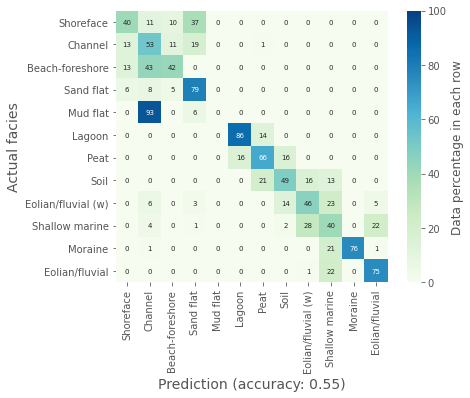

In [12]:
plot_recall(y_df, ['y_rf'], Facies, 'test' )

In [13]:
y_df['composite_id'] = data_df.composite_id.values[test_idx]
y_df.set_index('composite_id', inplace=True)
y_df = pd.concat([pd.read_csv('data/info.cleaned.all.csv', index_col=0, usecols=['composite_id', 'composite_depth_mm', 'section_depth_mm', 'core_id', 'core_section']), y_df], 
                   axis=1, join='inner') 

In [14]:
def detect_conjuction(data_df, y_preds, Facies, split):
    """
    data_df is the dataframe having info and labels.
    y_preds is a list of the column names of labels you want to plot.
    Faceis is a list of facies names.
    split is the name of the dataset, which used for filename (train or test).
    """
    
    data_df['id'] = range(len(data_df))
    mat_dict = {}


    for y_pred in y_preds:
        y_mean = []
        composite_id = []
        model_name = y_pred[2:] if len(y_pred)>1 else 'description'
        
        for section in np.unique(data_df.core_section):
            y_mean = np.hstack((y_mean, data_df.loc[data_df.core_section == section, y_pred].rolling(window = 2).mean()))
            composite_id = np.hstack((composite_id, data_df[data_df.core_section == section].index))

        # merge the rolling with the original label
        # this will lost the first data poit in each section, but it doesn't mater
        # because the boundary shouldn't be at the begining of each section
        tmp_df = pd.concat([data_df, pd.DataFrame({'y_mean': y_mean}, index = composite_id).dropna()], join = 'inner', axis = 1)

        # if y_pred is not same as y_mean, it means there is a boundary (facies change) between this and above depth
        bd_df = tmp_df[tmp_df[y_pred] != tmp_df.y_mean].copy()
        bd_df['ab_id'] = bd_df.id - 1
        if len(model_name) > 3:
            print('There are {} boundaries in description.'.format(len(bd_df)))
        else:
            print('There are {} boundaries in the optimized {} model\'s predictions.'.format(len(bd_df), model_name))

        # build matrix of boundaries
        bd_mat = np.zeros(shape = (12, 12), dtype = int)

        for row in bd_df.iterrows():
            tmp = np.zeros(shape = (12, 12), dtype = int)
            tmp[data_df[y_pred][int(row[1].ab_id)], data_df[y_pred][int(row[1].id)]] = 1
            bd_mat += tmp
            
        mat_dict[y_pred] = bd_mat
        
        # plot
        fig, ax = plt.subplots(1, 1, figsize = (7, 5))
        sns.heatmap(bd_mat, annot = bd_mat.astype(str), ax = ax, cmap = 'Greens', square = True, #vmin=0, vmax=130,
                    xticklabels = Facies, yticklabels = Facies, fmt = 's', 
                    annot_kws={'size': 7}, cbar_kws = {'label' : 'Counts (total: {})'.format(len(bd_df))}
                   )
        ax.set_xlabel('Below facies', size = 16)
        ax.set_ylabel('Above facies', size = 16)
        fig.savefig('results/roll_{}_op_conjunction_matrix_{}_{}.png'.format(split, model_name, date))

There are 29 boundaries in description.
There are 977 boundaries in the optimized rf model's predictions.


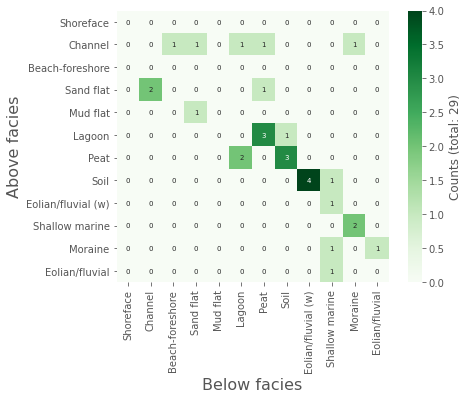

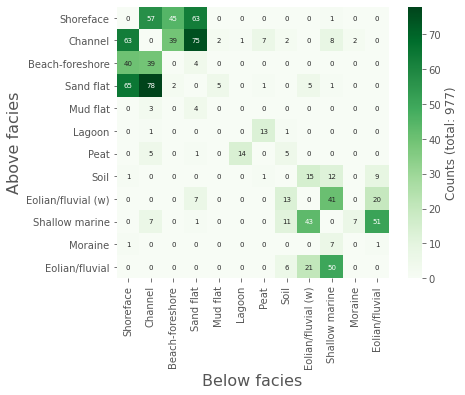

In [15]:
detect_conjuction(y_df,  ['y', 'y_rf'], Facies, 'test')

# Summary
Comparing to the last RF model's performance, this optimized model has higher accuracy and less over-fitting issue, but the fragmented characteristic also increases. It's accuracy is not as good as the optimized SVC model, but it has less fragmented characteristic. The accuracy and similarity to the reality (less fragmented) seem to confict with each other.

I have tried...I think that is it. Let's call it and start to write manuscript.